In [1]:
import pandas as pd
import nltk
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer


df = pd.read_csv('WomensClothingE-CommerceReviews.csv')

In [2]:
# Display the first few rows of the DataFrame
print(df.head())



   Age                    Title  \
0   33                      NaN   
1   34                      NaN   
2   60  Some major design flaws   
3   50         My favorite buy!   
4   47         Flattering shirt   

                                         Review Text  Rating  Recommended IND  \
0  Absolutely wonderful - silky and sexy and comf...       4                1   
1  Love this dress!  it's sooo pretty.  i happene...       5                1   
2  I had such high hopes for this dress and reall...       3                0   
3  I love, love, love this jumpsuit. it's fun, fl...       5                1   
4  This shirt is very flattering to all due to th...       5                1   

   Positive Feedback Count   Division Name Department Name Class Name  
0                        0       Initmates        Intimate  Intimates  
1                        4         General         Dresses    Dresses  
2                        0         General         Dresses    Dresses  
3             

In [3]:
def preprocess_text(text):

    tokens = nltk.word_tokenize(text.lower())

    tokens = [token for token in tokens if token.isalnum()]
    

    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    

    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    

    stemmer = PorterStemmer()
    tokens = [stemmer.stem(token) for token in tokens]
    
    return tokens

In [8]:
# Apply the preprocessing function to the review text column
df['preprocessed_text'] = df['Review Text'].apply(preprocess_text)


AttributeError: 'float' object has no attribute 'lower'

In [7]:
# Display the preprocessed text for a few reviews
print(df['preprocessed_text'].head(4))

KeyError: 'preprocessed_text'

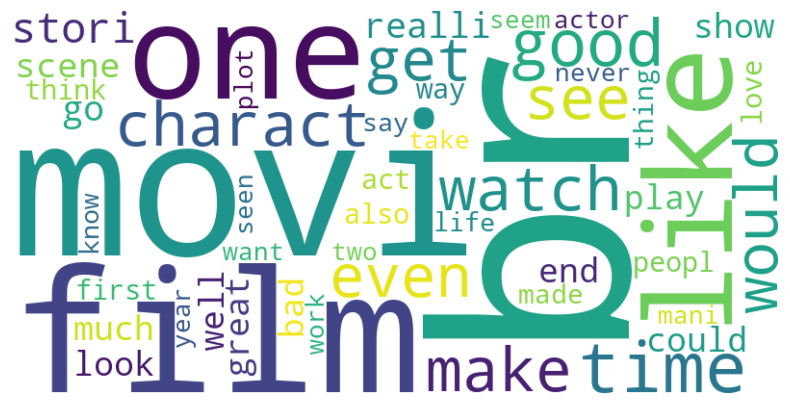

In [22]:
# Combine all the preprocessed tokens into a single list
all_tokens = []
for tokens_list in df['preprocessed_text']:
    all_tokens.extend(tokens_list)

# Calculate the frequency of each token
token_freq = nltk.FreqDist(all_tokens)

# Get the most common 50 tokens
most_common_tokens = token_freq.most_common(50)

# Plot the frequency of the most common 50 words using a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(most_common_tokens))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [23]:
import pandas as pd

# Read the dataset from CSV into a pandas DataFrame
df = pd.read_csv('MovieReview.csv')

# Extract the first 20 reviews
text1_reviews = df['text'][:20]

# Extract the next 20 reviews
text2_reviews = df['text'][20:40]

# Write the first 20 reviews to Text1.txt
with open('Text1.txt', 'w', encoding='utf-8') as text1_file:
    for review in text1_reviews:
        text1_file.write(review + '\n')

# Write the next 20 reviews to Text2.txt
with open('Text2.txt', 'w', encoding='utf-8') as text2_file:
    for review in text2_reviews:
        text2_file.write(review + '\n')


In [24]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity


def preprocess_text(text):
    # Tokenization
    tokens = nltk.word_tokenize(text.lower())
    
    # Removing special characters and keeping only alphanumeric tokens
    tokens = [token for token in tokens if token.isalnum()]
    
    # Removing stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    # Stemming
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(token) for token in tokens]
    
    return tokens
def jaccard_similarity(set1, set2):
    intersection = len(set1.intersection(set2))
    union = len(set1.union(set2))
    return intersection / union


In [29]:
# Open the text file for reading
with open('Text1.txt', 'r', encoding='utf-8') as file:
    # Read the entire contents of the file into a variable
    Text1= file.read()

with open('Text2.txt', 'r', encoding='utf-8') as file:
    # Read the entire contents of the file into a variable
    Text2= file.read()

tokens1 = set(preprocess_text(Text1))
tokens2 = set(preprocess_text(Text2))

similarity_score = jaccard_similarity(tokens1, tokens2)
print(f"Jaccard Similarity: {similarity_score}")
print(f"Tokens 1: {tokens1}\nTokens 2: {tokens2}")

vectorizer = TfidfVectorizer()
vector1 = vectorizer.fit_transform([' '.join(tokens1)])
vector2 = vectorizer.transform([' '.join(tokens2)])

cos_similarity = cosine_similarity(vector1, vector2)
print(f"Cosine Similarity:\n{cos_similarity}")

Jaccard Similarity: 0.22837370242214533
Tokens 1: {'mural', 'accus', 'emmanuel', 'use', 'unaccomplish', 'seriou', 'perenni', 'seoul', 'miracl', 'never', 'buy', 'jim', 'may', 'dealer', 'blame', 'long', 'alreadi', 'releas', 'written', 'wish', 'founda', 'lovingli', 'stereotyp', 'till', 'world', 'talki', 'give', 'somehow', 'repres', 'evid', 'look', 'younger', 'vulgar', 'flirtati', 'memori', 'fail', 'weird', 'posit', 'anyth', 'slightli', 'soft', 'film', 'add', 'borkowski', 'everyth', 'spectat', 'set', 'embitt', 'ashley', 'execut', 'appear', 'galiena', 'torrenti', 'bother', 'dozen', 'though', '17', 'swept', 'suffer', 'dive', 'bond', 'hilari', 'mad', 'relationship', 'pictur', 'disturb', 'urban', 'exot', 'short', 'origin', 'floor', 'aspect', 'br', 'jump', 'sumamr', 'captur', 'fool', 'episod', 'fit', 'disappoint', 'son', 'chest', 'moment', 'partisan', 'high', 'starv', 'sequel', 'hairi', 'flee', 'hang', 'seri', 'baddi', 'erot', 'hey', 'walk', 'imposs', 'sti', 'bout', 'properli', 'plot', 'copi', 

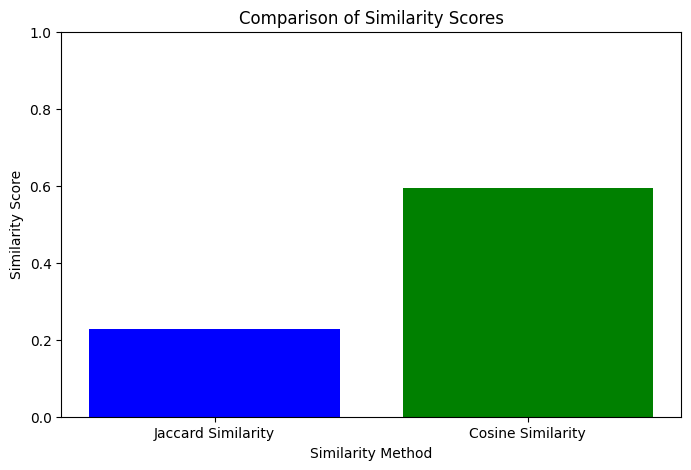

In [31]:
# Plotting the similarity scores
scores = [0.22837370242214533, 0.5935921]
methods = ['Jaccard Similarity', 'Cosine Similarity']

# Bar plot
plt.figure(figsize=(8, 5))
plt.bar(methods, scores, color=['blue', 'green'])
plt.xlabel('Similarity Method')
plt.ylabel('Similarity Score')
plt.title('Comparison of Similarity Scores')
plt.ylim(0, 1)  # Set the y-axis limit from 0 to 1
plt.show()

